In [1]:
import sys
sys.path.append('../')
import pystan
import stan_utility

import arviz as az
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as stats

import pandas as pd
import matplotlib as mpl

In [2]:
light="#FFFCDC"
light_highlight="#FEF590"
mid="#FDED2A"
mid_highlight="#f0dc05"
dark="#EECA02"
dark_highlight="#BB9700"
green="#00FF00"
light_grey="#DDDDDD"

plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi']= 200

In [ ]:
#1 gamma

In [3]:
with open('gamma.stan', 'r') as file:
    print(file.read())

data {
  int alfa;
  int beta;
}

generated quantities {
real theta = gamma_rng(alfa,beta);
real theta_inv = inv_gamma_rng(alfa,beta);
}


In [7]:
model_prior=stan_utility.compile_model('gamma.stan')

Using cached StanModel


In [14]:
R=1000
sim_data=dict(alfa=5, beta=10)
sim_ppc=model_prior.sampling(data=sim_data,algorithm="Fixed_param", iter=R, warmup=0, chains=1, refresh=R,
                             seed=30042020)

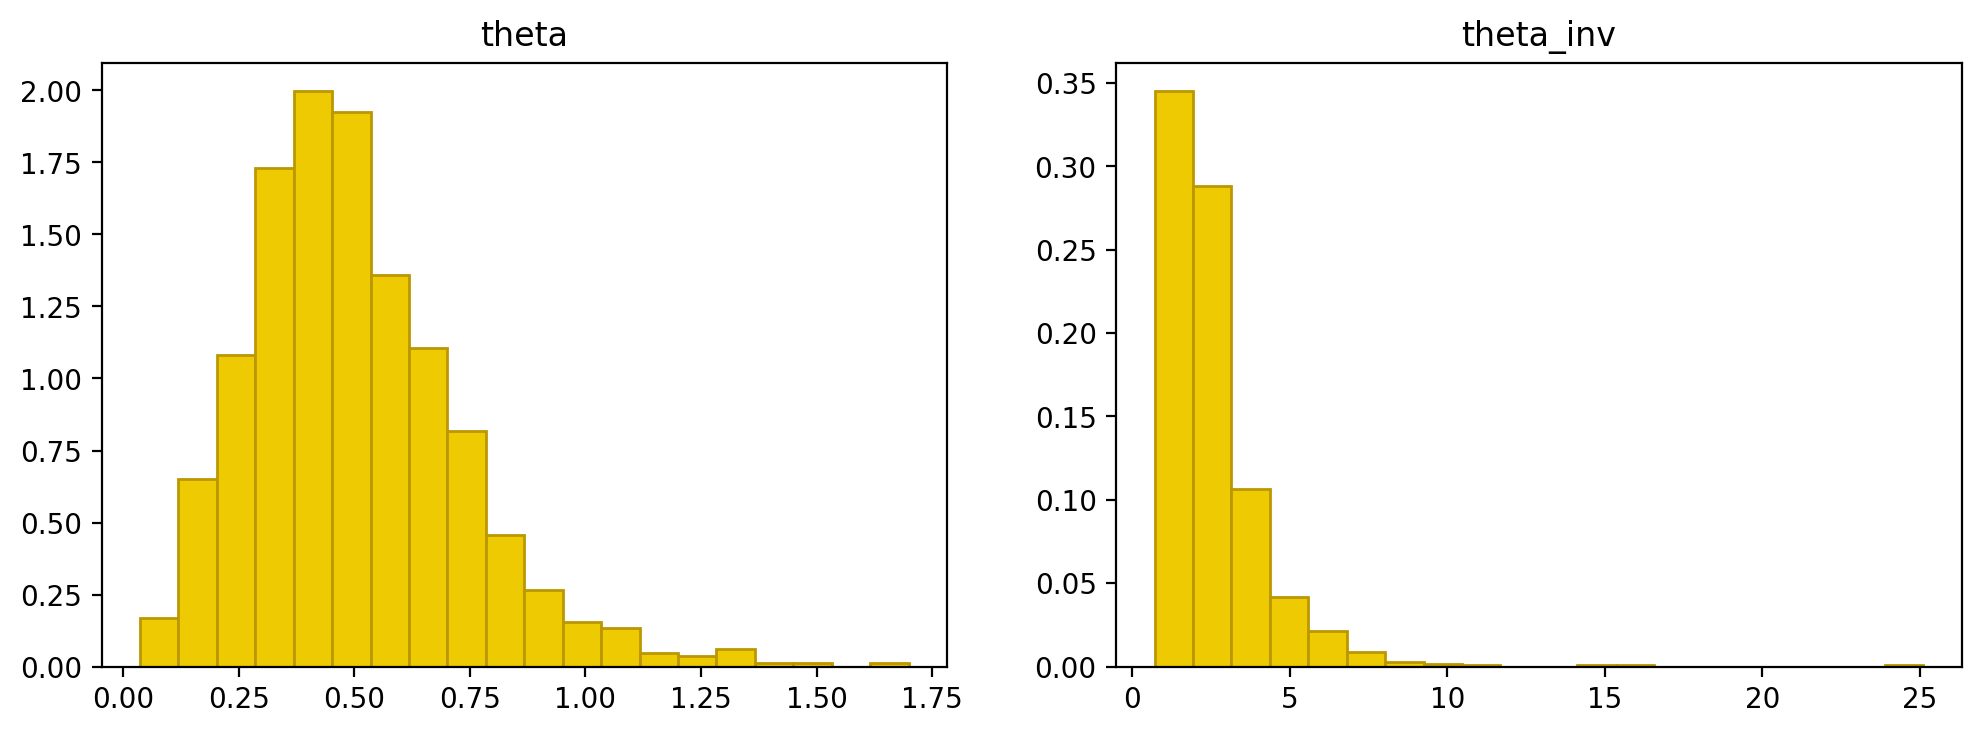

In [29]:
params=sim_ppc.extract()
theta=params['theta']
theta_inv=params['theta_inv']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1=axes[0]
ax1.hist(theta,color=dark,edgecolor=dark_highlight,density=True,bins=20)
ax1.set_title('theta')
ax2=axes[1]
ax2.hist(theta_inv,color=dark,edgecolor=dark_highlight,density=True,bins=20)
ax2.set_title('theta_inv')
plt.show()

In [27]:
np.median(theta)

0.46407521363440424

In [28]:
np.median(theta_inv)

2.121229860911358

In [30]:
#Using albebra_solver (see notebook from lecture on poisson distribution modelling) find parameters for Gamma and invGamma for which 98% probability is for values between 5 and 10. Sample for those distributions and compare histograms.

In [31]:
#2 binomial

In [79]:
with open('2_binomial_poisson.stan', 'r') as file:
    print(file.read())

data {
    real alfa;
    real beta;
    
}

generated quantities {
    real lambda = alfa*beta/(1-beta);
    real y_binomial = neg_binomial_rng(alfa,beta);
    real y_poisson = poisson_rng(lambda);
}


In [81]:
model_prior=stan_utility.compile_model('2_binomial_poisson.stan')

Using cached StanModel


In [82]:
R=1000
alfa = 50
beta = 0.1
sim_data=dict(alfa=alfa, beta=beta)
sim_ppc=model_prior.sampling(data=sim_data,algorithm="Fixed_param", iter=R, warmup=0, chains=1, refresh=R,
                             seed=30042020)

In [83]:
params=sim_ppc.extract()
y_binomial=params['y_binomial']
y_poisson=params['y_poisson']

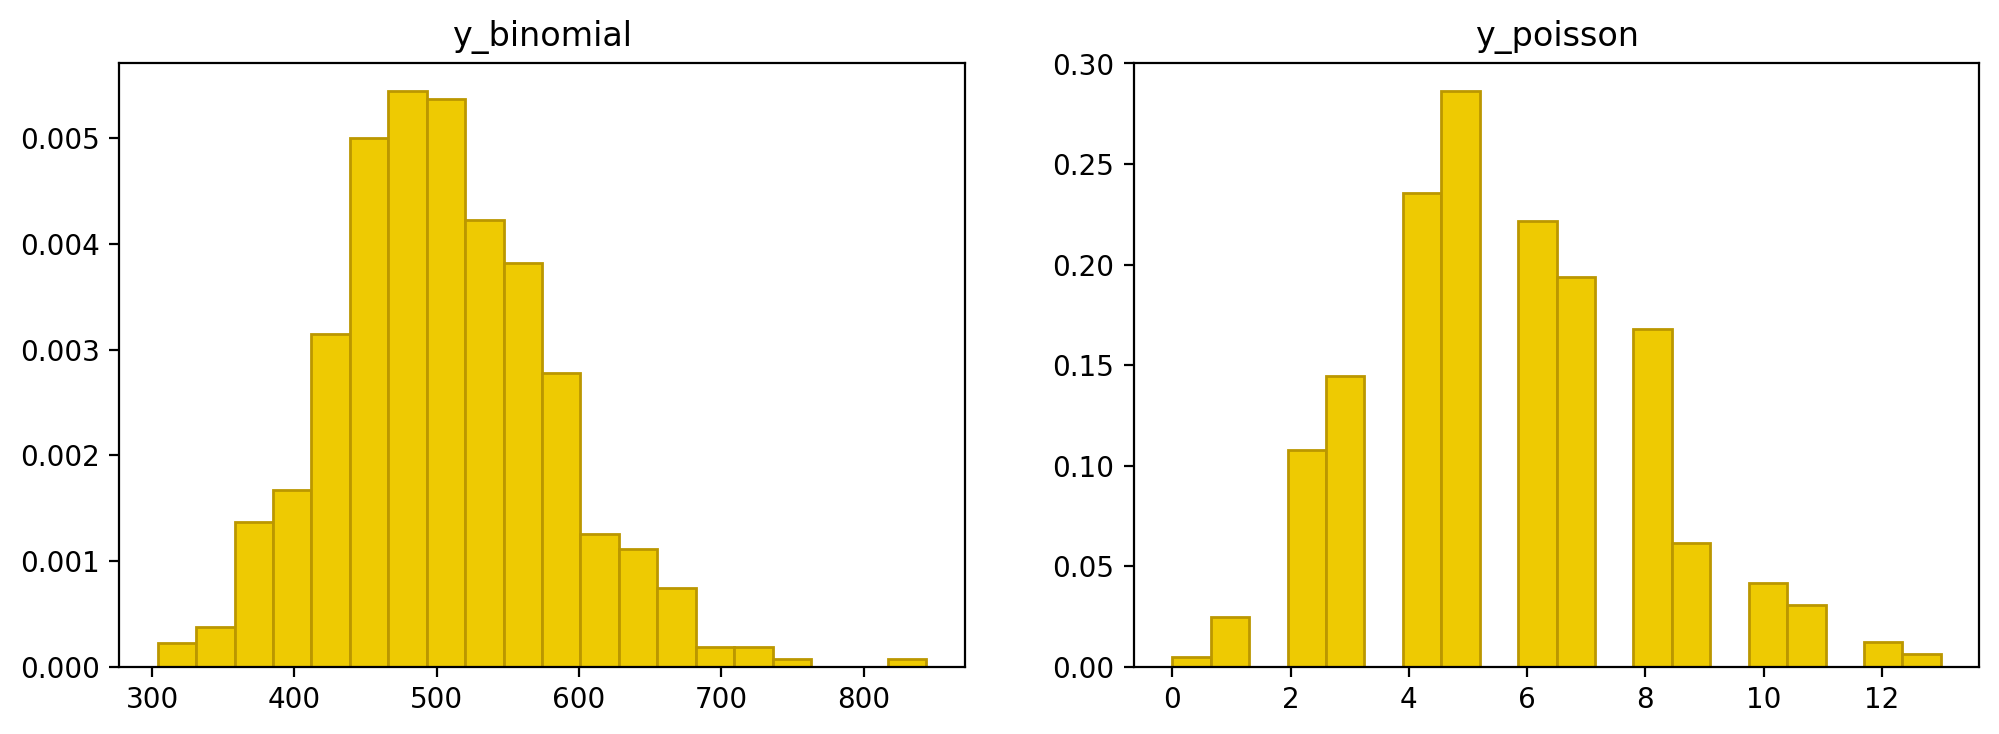

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1=axes[0]
ax1.hist(y_binomial,color=dark,edgecolor=dark_highlight,density=True,bins=20)
ax1.set_title('y_binomial')
ax2=axes[1]
ax2.hist(y_poisson,color=dark,edgecolor=dark_highlight,density=True,bins=20)
ax2.set_title('y_poisson')
plt.show()

data {
    real lambd;
}

generated quantities {
    real theta = poisson_rng(lambd);
}
Using cached StanModel


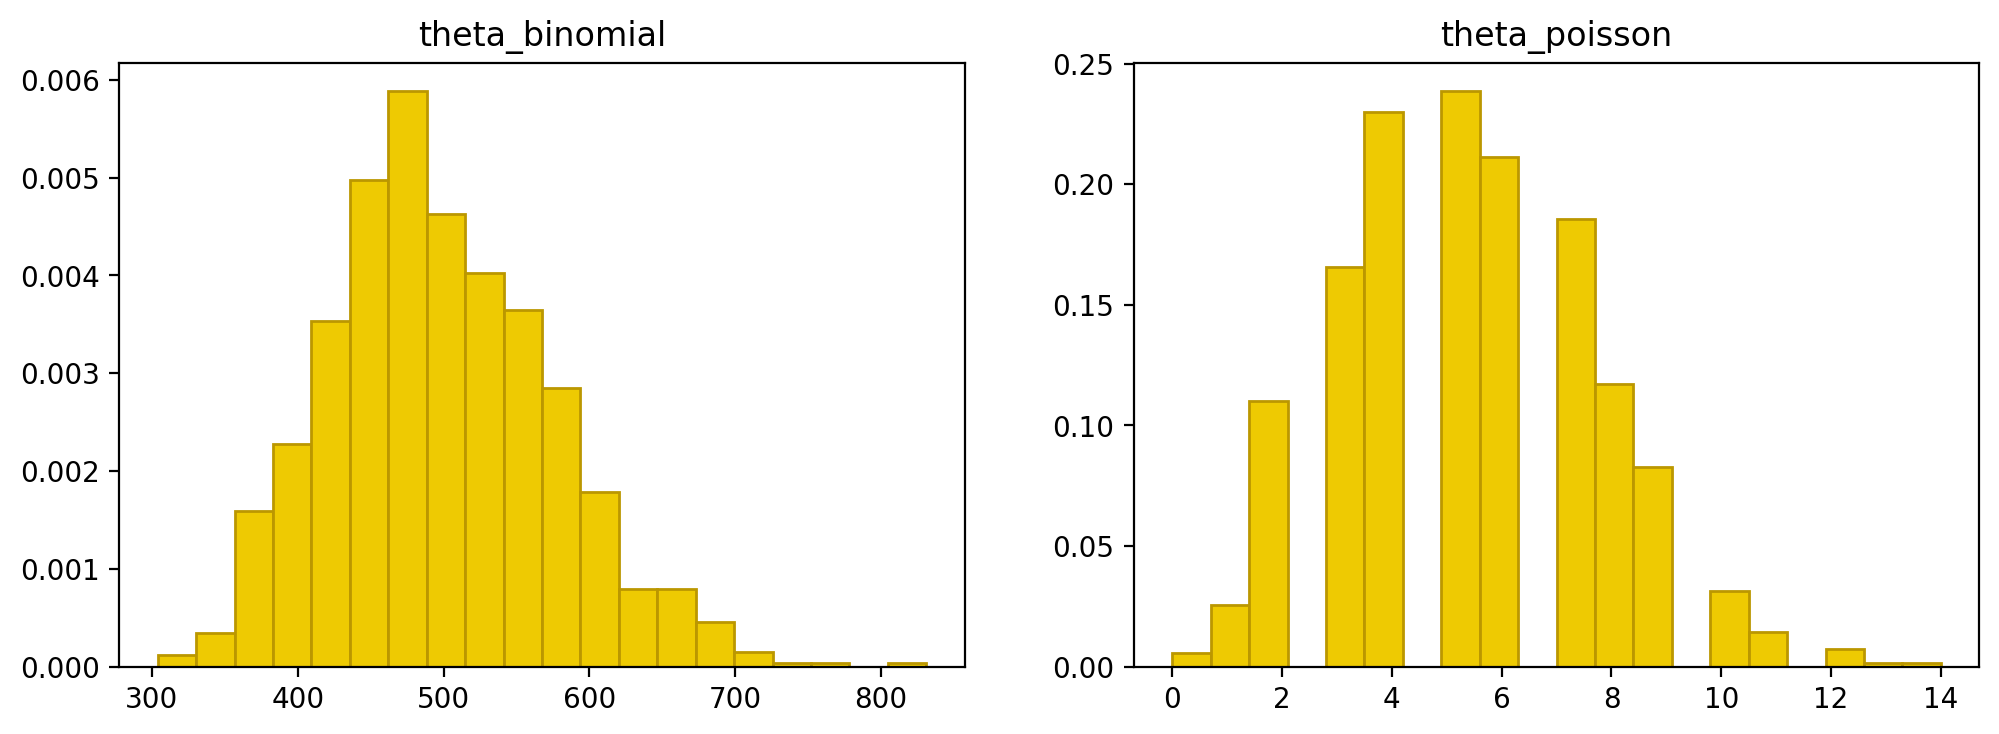

In [86]:
#with two models same results
with open('poisson.stan', 'r') as file:
    print(file.read())
model_prior=stan_utility.compile_model('poisson.stan')
lambda_poisson = alfa*beta/(1-beta)
sim_data=dict(lambd=lambda_poisson)
sim_ppc=model_prior.sampling(data=sim_data,algorithm="Fixed_param", iter=R, warmup=0, chains=1, refresh=R,
                             seed=30042020)
params=sim_ppc.extract()
theta_poisson=params['theta']
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax1=axes[0]
ax1.hist(theta_binomial,color=dark,edgecolor=dark_highlight,density=True,bins=20)
ax1.set_title('theta_binomial')
ax2=axes[1]
ax2.hist(theta_poisson,color=dark,edgecolor=dark_highlight,density=True,bins=20)
ax2.set_title('theta_poisson')
plt.show()

In [ ]:
#more grouped values?

In [ ]:
# 3 student t

In [92]:
with open('3_student_t_cauchy.stan', 'r') as file:
    print(file.read())

data {
    real nu;
    real mu;
    real sigma; 
}

generated quantities {
    real y_student_t = student_t_rng(nu, mu, sigma);
    real y_normal = normal_rng(mu, sigma);
    real y_cauchy = cauchy_rng(mu, sigma);
}


In [94]:
model_prior=stan_utility.compile_model('3_student_t_cauchy.stan')

Using cached StanModel


In [129]:
R=1000
nu = 1 #degree
mu = 10 #mean
sigma = 1 #variance
sim_data=dict(nu = nu, mu = mu, sigma = sigma)
sim_ppc=model_prior.sampling(data=sim_data,algorithm="Fixed_param", iter=R, warmup=0, chains=1, refresh=R,
                             seed=30042020)

In [130]:
params=sim_ppc.extract()
y_student_t=params['y_student_t']
y_normal=params['y_normal']
y_cauchy=params['y_cauchy']

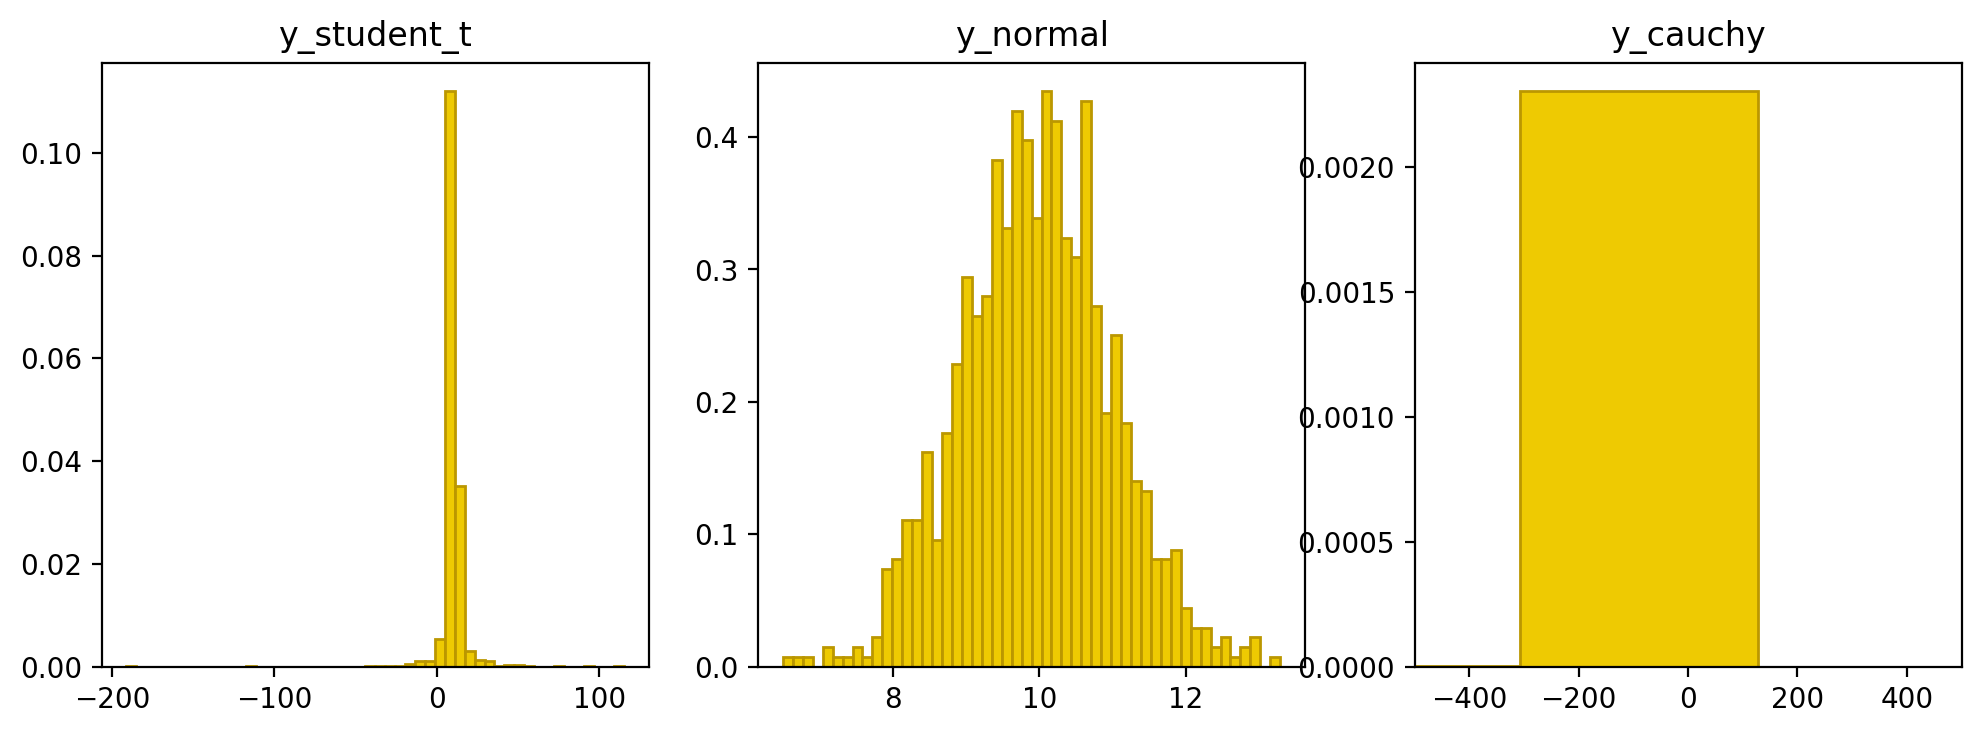

In [131]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1=axes[0]
ax1.hist(y_student_t,color=dark,edgecolor=dark_highlight,density=True,bins=50)
ax1.set_title('y_student_t')
ax2=axes[1]
ax2.hist(y_normal,color=dark,edgecolor=dark_highlight,density=True,bins=50)
ax2.set_title('y_normal')
ax3=axes[2]
ax3.hist(y_cauchy,color=dark,edgecolor=dark_highlight,density=True,bins=50)
ax3.set_title('y_cauchy')
plt.xlim(-500, 500)
plt.show()

In [132]:
#??? idk why cauchy is how it is

In [133]:
nu = 2 #degree
sim_data=dict(nu = nu, mu = mu, sigma = sigma)
sim_ppc=model_prior.sampling(data=sim_data,algorithm="Fixed_param", iter=R, warmup=0, chains=1, refresh=R,
                             seed=30042020)
params=sim_ppc.extract()
y_student_t2=params['y_student_t']

In [135]:
nu = 4 #degree
sim_data=dict(nu = nu, mu = mu, sigma = sigma)
sim_ppc=model_prior.sampling(data=sim_data,algorithm="Fixed_param", iter=R, warmup=0, chains=1, refresh=R,
                             seed=30042020)
params=sim_ppc.extract()
y_student_t4=params['y_student_t']

In [136]:
nu = 10 #degree
sim_data=dict(nu = nu, mu = mu, sigma = sigma)
sim_ppc=model_prior.sampling(data=sim_data,algorithm="Fixed_param", iter=R, warmup=0, chains=1, refresh=R,
                             seed=30042020)
params=sim_ppc.extract()
y_student_t10=params['y_student_t']

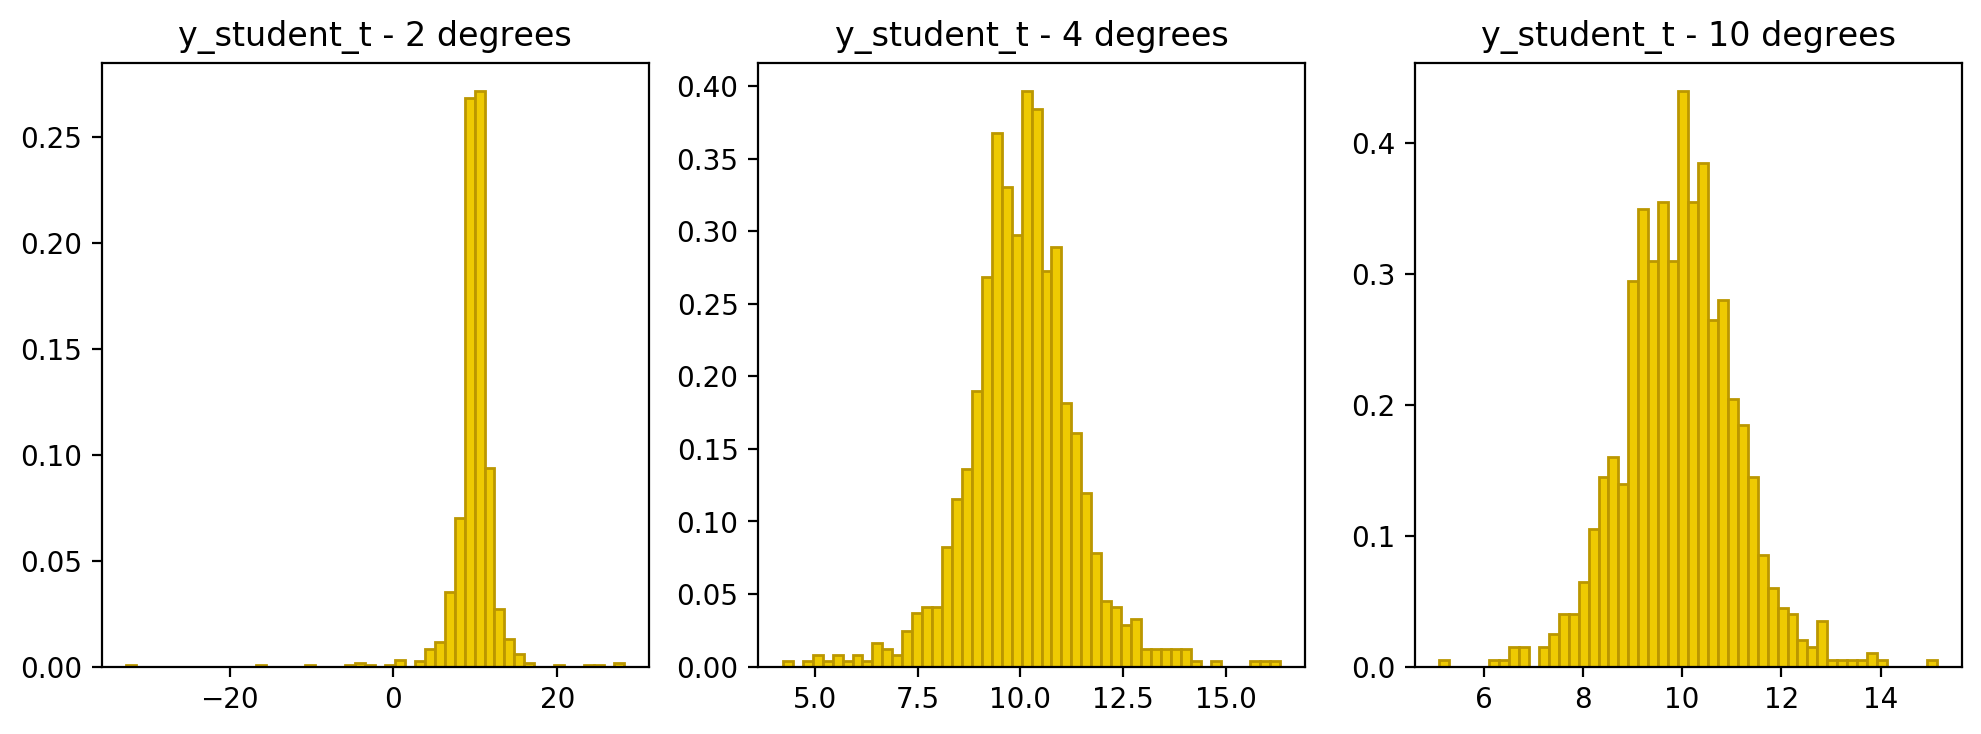

In [140]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1=axes[0]
ax1.hist(y_student_t2,color=dark,edgecolor=dark_highlight,density=True,bins=50)
ax1.set_title('y_student_t - 2 degrees')
ax2=axes[1]
ax2.hist(y_student_t4,color=dark,edgecolor=dark_highlight,density=True,bins=50)
ax2.set_title('y_student_t - 4 degrees')
ax3=axes[2]
ax3.hist(y_student_t10,color=dark,edgecolor=dark_highlight,density=True,bins=50)
ax3.set_title('y_student_t - 10 degrees')
plt.show()

In [139]:
#the more degrees the more narrow results